Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [48]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [4]:
file_path = 'train.csv'
data = pd.read_csv(file_path)

In [64]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

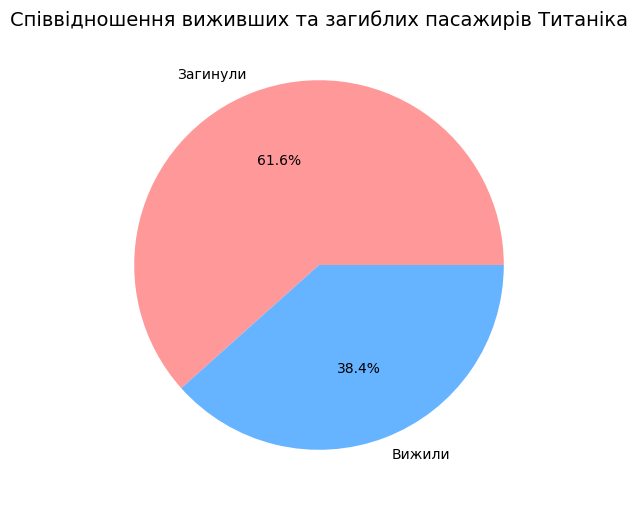

In [27]:
survival_counts = data['Survived'].value_counts()
labels = ['Загинули', 'Вижили']
colors=['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Співвідношення виживших та загиблих пасажирів Титаніка', fontsize=14)
plt.show()

Ця діаграма показує, що після катастрофи вижило менше половини пасажирів (38.4%)

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


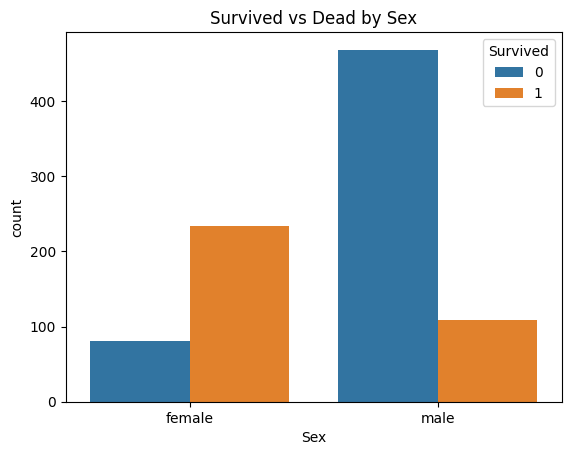

<Figure size 1000x600 with 0 Axes>

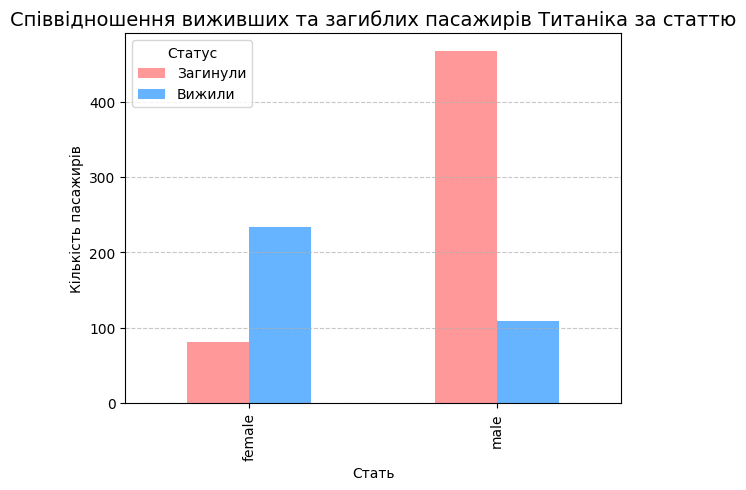

In [31]:
survival_by_sex = data.groupby(['Sex', 'Survived'], as_index=False).size()

survival_by_sex = survival_by_sex.pivot(index='Sex', columns='Survived', values='size')
survival_by_sex.columns = ['Загинули', 'Вижили']

plt.figure(figsize=(10, 6))
survival_by_sex.plot(kind='bar', stacked=False, color=colors)
plt.title('Співвідношення виживших та загиблих пасажирів Титаніка за статтю', fontsize=14)
plt.xlabel('Стать')
plt.ylabel('Кількість пасажирів')
plt.legend(title='Статус')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Ця діаграма показує, що жінок вижило більше ніж у два рази більше ніж чоловіків. Також ми можемо простежити, що співвідношення виживших/загиблих жінок набагато більше, ніж чоловіків. Тут ми можемо побачити підтвердження того факту, що спочатку евакуювали жінок, а потім - чоловіків

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

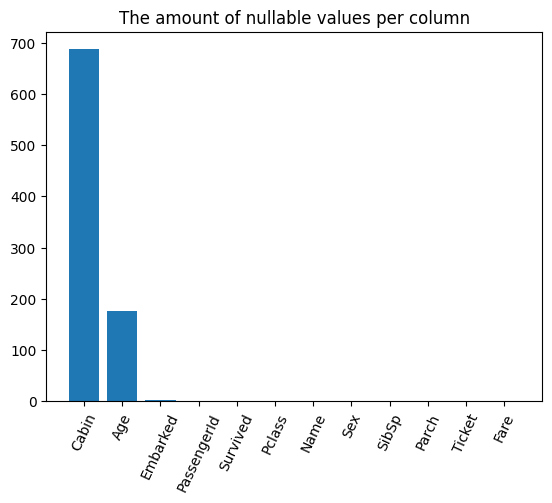

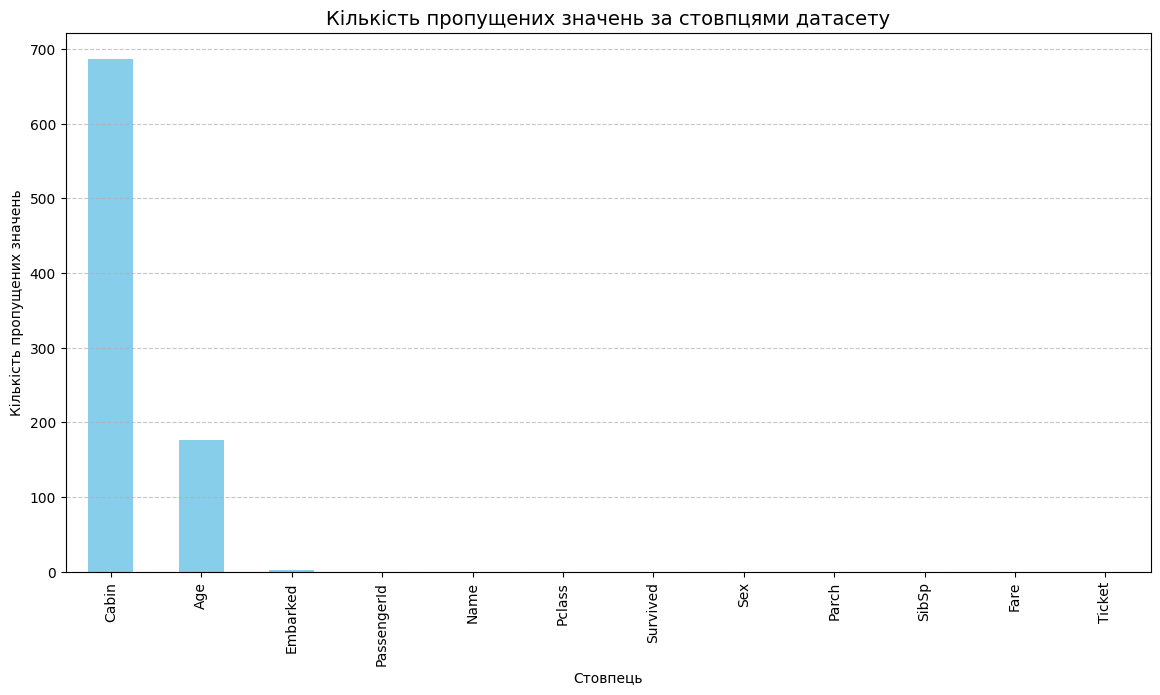

In [40]:
missing_values = data.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(14, 7))
ax = missing_values.plot(kind='bar', color='skyblue')

plt.title('Кількість пропущених значень за стовпцями датасету', fontsize=14)
plt.xlabel('Стовпець')
plt.ylabel('Кількість пропущених значень')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Ця діаграма відображає кількість пропущених значень за стовпцями датасету. Тут ми можемо побачити, що ми маємо найбільше пропущених значень у стовпці Cabin. Наступним стовпчиком по кількості пропущених значень є Age. Далі пропущено декілька значень у стовпчику Embarked. Усі інші стовпчики мають 0 пропущених значень.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

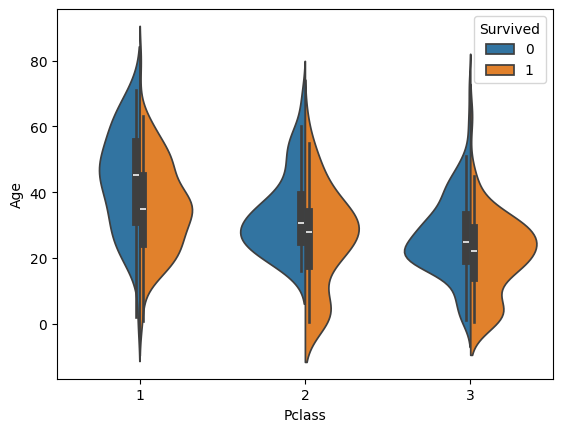

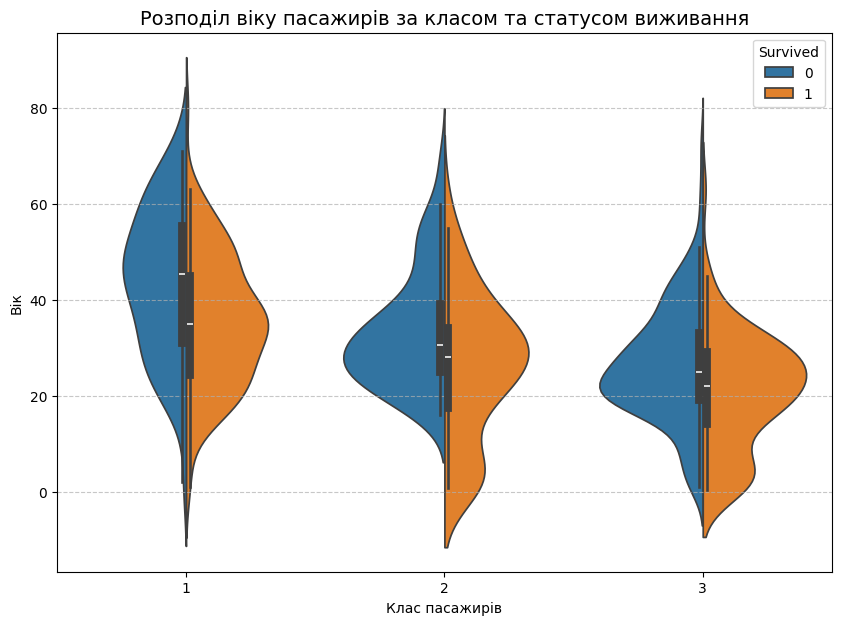

In [57]:
plt.figure(figsize=(10, 7))

ax = sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True,)

plt.title('Розподіл віку пасажирів за класом та статусом виживання', fontsize=14)
plt.xlabel('Клас пасажирів')
plt.ylabel('Вік')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Цей графік демонструє розподіл віку пасажирів в залежності від їх класу. Кожна діаграма, що відповідає за певний клас, розділена на дві частини, що показують розподіл окремо для пасажирів, що вижили, та для тих, хто загинув. Ми можемо проаналізувати цю діаграму з декількох сторін:
1. Вік / клас:
   На діаграмі ми можемо побачити, що в першому класі були переважно люди старші, за людей в інших класах. 3 клас мав найбільшу кількість дітей.
2. Вік, клас / виживання:
   У першому класі ми можемо побачити досить значну частку виживших
   У другому класі співвідношення виживших/загиблих стала меншою. Але при цьому тут ми можемо прослідкувати те, що співвідношення виживших/загиблих дітей набагато більше, ніж в інших вікових категоріях. Це підтверджує той факт, що порятунок дітей був пріоритетніший, ніж дорослих
   У третьому ж класі ми явно можемо побачити, що частка загиблих переважає частку виживших майже серед усіх вікових категорій, окрім дітей, так само як і у другому класі.


6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


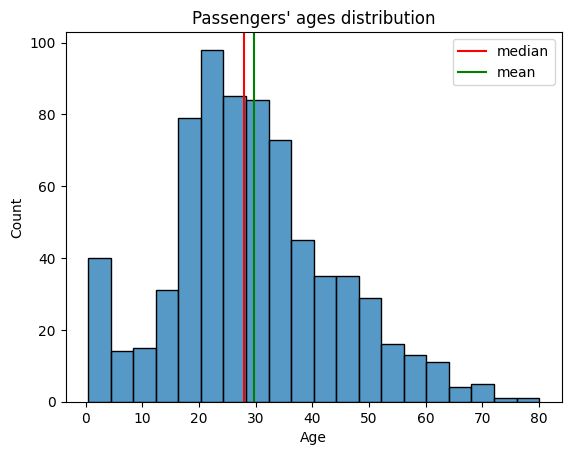

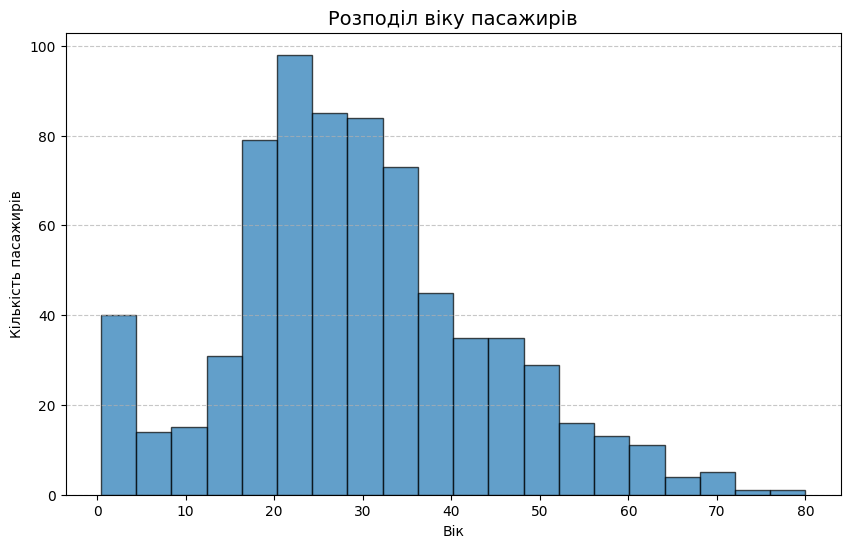

In [59]:
plt.figure(figsize=(10, 6))

plt.hist(data['Age'].dropna(), bins='auto', edgecolor='black', alpha=0.7)

plt.title('Розподіл віку пасажирів', fontsize=14)
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ця діаграма ілюструє розподіл кількості пасажирів за віком. Тут ми можемо побачити, що найбільше пасажирів було у віці 20-30 років. Також можемо побачити, що на борту було немало дітей до 10 років.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Залежність виживання від вартості квитка

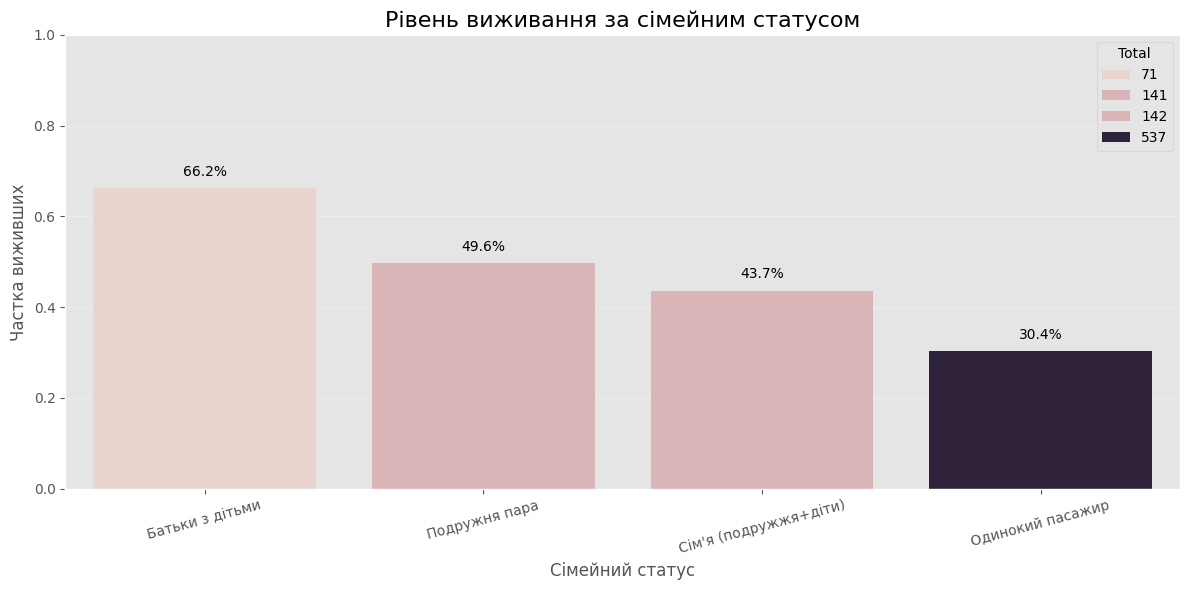

In [95]:
def define_family_status(row):
    if row['Parch'] > 0 and row['SibSp'] == 0:
        return 'Батьки з дітьми'
    elif row['Parch'] == 0 and row['SibSp'] > 0:
        return 'Подружня пара'
    elif row['Parch'] > 0 and row['SibSp'] > 0:
        return 'Сім\'я (подружжя+діти)'
    else:
        return 'Одинокий пасажир'

data['Family_Status'] = data.apply(define_family_status, axis=1)

family_survival = data.groupby('Family_Status')['Survived'].agg(['count', 'mean'])
family_survival.columns = ['Total', 'Survival_Rate']
family_survival = family_survival.sort_values('Survival_Rate', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=family_survival.index, y='Survival_Rate', data=family_survival, hue=family_survival.iloc[:, 0],
            order=family_survival.index)
plt.title('Рівень виживання за сімейним статусом', fontsize=16)
plt.xlabel('Сімейний статус', fontsize=12)
plt.ylabel('Частка виживших', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)

for i, rate in enumerate(family_survival['Survival_Rate']):
    plt.text(i, rate+0.02, f'{rate:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

На цій діаграмі ми можемо побачити, що найбільше шансів вижити було у батьків з дітьми, що ще раз підтверджує факт, що порятунок дітей був пріоритетом. Найменше вижило одиноких пасажирів.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

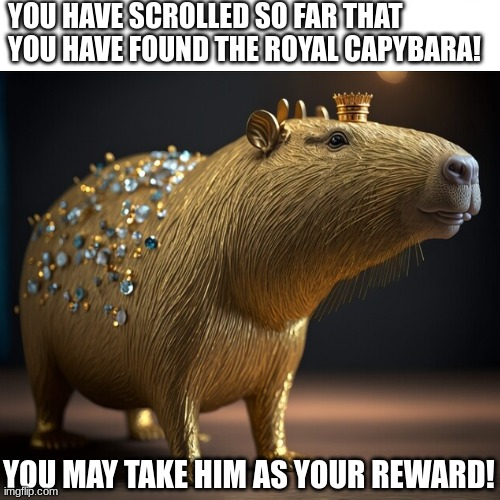